In [ ]:
# # Get the data
# import zipfile
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the download file
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()


In [1]:
ls pizza_steak


test/  train/


In [2]:
import os

# walk throught pizza steak directory and list number  of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(
        f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [3]:
!ls -la pizza_steak

total 0
drwxr-xr-x 1 stephen stephen  18 Dec 31 07:59 .
drwxr-xr-x 1 stephen stephen 122 Dec 31 21:31 ..
drwxr-xr-x 1 stephen stephen  20 Aug 20  2020 test
drwxr-xr-x 1 stephen stephen  20 Aug 20  2020 train


In [4]:
# Another way to find out how many images are in a folder
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_test = len(os.listdir('pizza_steak/test/steak'))

num_steak_images_test, num_steak_images_train


(250, 750)

To visualize the images, first get the class names programmatically

In [5]:
# Get the class name programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
# Created a list of class_names for the subdirectory
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)


['pizza' 'steak']


In [6]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    # Setup the target directory to view the image from
    target_folder = target_dir+target_class

    # Get a random image pah
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")  # Show the shape of the image

    return img


['3393688.jpg']
Image shape: (512, 382, 3)


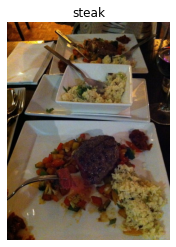

In [7]:
# View random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")


In [9]:
# Convert to tensor
import tensorflow as tf
tf.constant(img)


<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[ 30,   6,   0],
        [ 49,  18,   0],
        [ 81,  36,   3],
        ...,
        [ 79,  49,  41],
        [ 80,  50,  40],
        [ 80,  50,  39]],

       [[ 46,  20,   0],
        [ 72,  38,  13],
        [107,  62,  31],
        ...,
        [ 82,  53,  47],
        [ 82,  54,  43],
        [ 78,  50,  39]],

       [[ 56,  25,   7],
        [ 77,  40,  21],
        [104,  58,  34],
        ...,
        [ 82,  55,  48],
        [ 78,  54,  44],
        [ 70,  46,  36]],

       ...,

       [[  0,   4,   3],
        [  0,   2,   1],
        [  0,   1,   0],
        ...,
        [172, 161, 139],
        [169, 163, 131],
        [163, 157, 123]],

       [[  0,   3,   1],
        [  0,   2,   1],
        [  0,   3,   0],
        ...,
        [167, 158, 129],
        [164, 156, 133],
        [162, 154, 135]],

       [[  0,   2,   0],
        [  0,   1,   0],
        [  0,   4,   0],
        ...,
        [165, 154, 12

In [10]:
# Image shape
img.shape


(512, 382, 3)

In [11]:
# Normalize the data
img/255.


array([[[0.11764706, 0.02352941, 0.        ],
        [0.19215686, 0.07058824, 0.        ],
        [0.31764706, 0.14117647, 0.01176471],
        ...,
        [0.30980392, 0.19215686, 0.16078431],
        [0.31372549, 0.19607843, 0.15686275],
        [0.31372549, 0.19607843, 0.15294118]],

       [[0.18039216, 0.07843137, 0.        ],
        [0.28235294, 0.14901961, 0.05098039],
        [0.41960784, 0.24313725, 0.12156863],
        ...,
        [0.32156863, 0.20784314, 0.18431373],
        [0.32156863, 0.21176471, 0.16862745],
        [0.30588235, 0.19607843, 0.15294118]],

       [[0.21960784, 0.09803922, 0.02745098],
        [0.30196078, 0.15686275, 0.08235294],
        [0.40784314, 0.22745098, 0.13333333],
        ...,
        [0.32156863, 0.21568627, 0.18823529],
        [0.30588235, 0.21176471, 0.17254902],
        [0.2745098 , 0.18039216, 0.14117647]],

       ...,

       [[0.        , 0.01568627, 0.01176471],
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0

## Image was divided by 255 because the maximum pixel value of images (colors) is 255

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess the data (get all of the pixel values between 0 and 1. Also normalize/scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to the data directory
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directores and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42)
valid_data = valid_datagen.flow_from_directory(
    directory=test_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42)

# Build a CNN model (same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),  # Same as above
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    # Added to check if the model improves
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(
    train_data), validation_data=valid_data, validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 96s 2s/step - loss: 0.6067 - accuracy: 0.6720 - val_loss: 0.4521 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 92s 2s/step - loss: 0.4680 - accuracy: 0.7893 - val_loss: 0.3885 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 91s 2s/step - loss: 0.4324 - accuracy: 0.8093 - val_loss: 0.3576 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 90s 2s/step - loss: 0.4122 - accuracy: 0.8080 - val_loss: 0.3503 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 90s 2s/step - loss: 0.3908 - accuracy: 0.8300 - val_loss: 0.3363 - val_accuracy: 0.8480


In [13]:
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    '''
    Returns separate loss curves for training and validation metrics
    '''
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))  # how many epochs

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, loss, label='training_accuracy')
    plt.plot(epochs, loss, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()


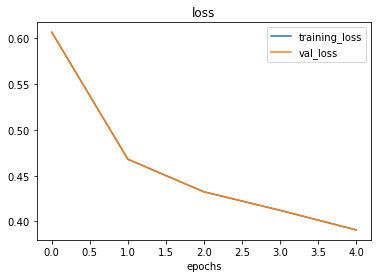

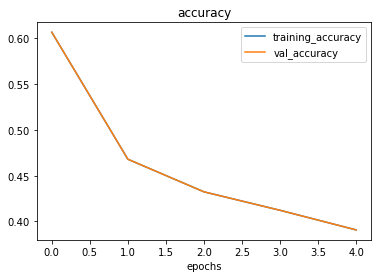

In [15]:
plot_loss_curves(history_1)


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an augumented train data
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             shear_range=0.2,  # how much the image will be sheared
                                             rotation_range=0.2,  # how much the image will be rotated
                                             zoom_range=0.2,  # zoom in randomly
                                             width_shift_range=0.2,  # move the image around on the x-axis
                                             height_shift_range=0.2,  # move the image around on the y-axis
                                             horizontal_flip=True)  # Flips the image


In [17]:
# Import data and augment it from training directory
print("Augmented data")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir, target_size=(
    224, 224), batch_size=32, class_mode='binary', shuffle=False, seed=42)

print('Non-augmented data')
train_data = train_datagen.flow_from_directory(
    directory=train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42, shuffle=False)

print('None-augmented test data')
# ...


Augmented data
Found 1500 images belonging to 2 classes.
Non-augmented data
Found 1500 images belonging to 2 classes.
None-augmented test data


showing image number: 30


NameError: name 'augmented_images' is not defined

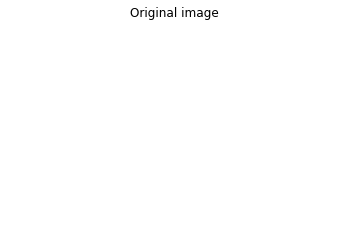

<Figure size 432x288 with 0 Axes>

In [18]:
# Show original image and augmented image
import random
rand_number = random.randint(0, 32)  # the batch size is 32
print(f'showing image number: {rand_number}')
# plt.imshow(images[rand_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[rand_number])
plt.title(f"Augmented image")
plt.axis(False)


## Making predictions

In [19]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [20]:
print(class_name)


['pizza' 'steak']


In [22]:
# Get test image
pizza_1 = mpimg.imread("pizza_01.jpg")
pizza_1


array([[[ 33,  28,  24],
        [ 33,  28,  24],
        [ 34,  29,  25],
        ...,
        [  9,   0,   0],
        [  7,   0,   0],
        [  7,   0,   0]],

       [[ 34,  29,  25],
        [ 35,  30,  26],
        [ 36,  31,  27],
        ...,
        [ 13,   4,   0],
        [ 11,   2,   0],
        [ 10,   1,   0]],

       [[ 38,  33,  29],
        [ 38,  33,  29],
        [ 39,  34,  30],
        ...,
        [ 20,  10,   1],
        [ 18,   8,   0],
        [ 16,   6,   0]],

       ...,

       [[121, 104,  84],
        [125, 108,  88],
        [134, 117,  97],
        ...,
        [184, 179, 175],
        [178, 173, 169],
        [173, 168, 164]],

       [[141, 123, 101],
        [147, 129, 107],
        [156, 138, 116],
        ...,
        [198, 193, 189],
        [189, 184, 180],
        [181, 176, 172]],

       [[158, 140, 116],
        [163, 145, 121],
        [170, 150, 126],
        ...,
        [216, 211, 207],
        [205, 200, 196],
        [195, 190, 186]]

(-0.5, 1499.5, 999.5, -0.5)

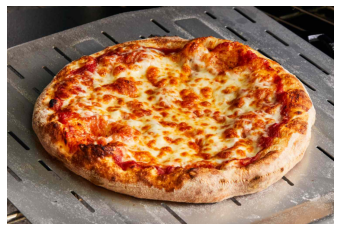

In [23]:
plt.imshow(pizza_1)
plt.axis(False)


In [24]:
pizza_1.shape


(1000, 1500, 3)

## Preprocess prediction images into same format as training data

In [25]:
def load_and_pre_image(filename, image_shape=224):
    '''
    Reads the image from a file and pre-processes it for tensorflow to use
    '''
    # read into the image
    img = tf.io.read_file(filename)
    # decode the read file into tensor
    img = tf.image.decode_image(img)
    # resize the image
    img = tf.image.resize(img, size=[image_shape, image_shape])
    # rescale the image (get all values between 0 and 1)
    img = img/255.
    return img


In [26]:
# load the img
pizza_01 = load_and_pre_image("pizza_01.jpg")
pizza_01


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.15206583, 0.13245799, 0.10892858],
        [0.17048319, 0.15087534, 0.12734593],
        [0.19787228, 0.17826444, 0.15473503],
        ...,
        [0.1830254 , 0.14773129, 0.08106462],
        [0.11312854, 0.07783443, 0.04254031],
        [0.07109734, 0.03580322, 0.0048703 ]],

       [[0.22714773, 0.20753989, 0.18401048],
        [0.24467787, 0.22507003, 0.20154062],
        [0.25079468, 0.23118684, 0.20765743],
        ...,
        [0.25206706, 0.21677294, 0.15010627],
        [0.27794325, 0.2227591 , 0.17052028],
        [0.20579958, 0.14970793, 0.09837661]],

       [[0.27058825, 0.2509804 , 0.22745098],
        [0.27058825, 0.2509804 , 0.22745098],
        [0.25357142, 0.23396358, 0.21043417],
        ...,
        [0.18561046, 0.15031634, 0.08364967],
        [0.31531256, 0.23513325, 0.16111085],
        [0.35073242, 0.26898563, 0.19653074]],

       ...,

       [[0.4569639 , 0.4177482 , 0.37853253],
        [0.15

In [27]:
pred = model_1.predict(tf.expand_dims(pizza_01, axis=0))


1/1 [==============================] - 0s 217ms/step


In [28]:
pred


array([[0.15345648]], dtype=float32)

In [29]:
pred_class = class_name[int(tf.round(pred))]
pred_class


'pizza'

The model predictions seems good

In [30]:
def pred_and_plot(model, filename, class_names=class_name):
    '''
    Plots and predicts a data. Receives a model, and filename to the image to be predicted
    '''
    # import the target image and preprocess it
    img = load_and_pre_image(filename)
    # make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    # plot the image and the prediction class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)


1/1 [==============================] - 0s 57ms/step


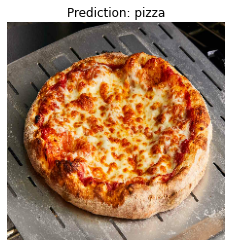

In [31]:
pred_and_plot(model_1, "pizza_01.jpg")


### In conclusion the model works pretty well at 80% accuracy